In [928]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess

####Set up network weights
# W = np.array([[16., -12.], [16., -5.]])
# pos = 12
# neg = -3
# W = np.array([[pos, 0, neg], [0, pos, neg], [neg, neg, 0]])

a = 16
b = 16
d = 4
e = -d*2
# W = np.array([[a, e, e, -b, 0, 0], [e, a, e, 0, -b, 0], [e, e, a, 0, 0, -b],
#               [a, 0, 0, -d, e, e], [0, a, 0, e, -d, e], [0, 0, a, e, e, -d]])

W = np.array([[a, e, -b, e], [e, a, e, -b],
              [a, e, -d, e], [e, a, e, -d]])
N = W.shape[0]

In [929]:
# plt.imshow(W)

In [930]:
#make file to simulate Wilson-Cowan network with XPP
ps = [-1,-1,-4,-4]
# ps = [-1,-1,-1,-4,-4,-4]
eqstring = ''
wi = 0
for i in range(1,W.shape[0]+1):
    eqstring+='x'+str(i)+"'=-x"+str(i)+"+f("+'w'+str((i-1)*N+i-1)+"*x"+str(i)+'+p%s+'%(i)#+'-b*y'+str(i)
    for j in range(1,W.shape[1]+1):
        if i!=j:
            eqstring+='w'+str(wi)+"*x"+str(j)+'+'
        wi+=1
    eqstring=eqstring[:-1]+')\n'
    
# wi = 0
# for i in range(1,W.shape[0]+1):
#     eqstring+='y'+str(i)+"'=(-y"+str(i)+"+f(c*x"+str(i)+'+q+'#+'-d*y'+str(i)
#     for j in range(1,W.shape[1]+1):
#         if i!=j:
#             eqstring+='w'+str(wi)+"*y"+str(j)+'+'
#         wi+=1
#     eqstring=eqstring[:-1]+'))/tau\n'

weighstring = 'p '
wi=0
for i in range(0,W.shape[0]):
    for j in range(0,W.shape[1]):
        weighstring+='w'+str(wi)+'='+str(round(W[i,j], 2))+','
        wi+=1
        
inputstring = 'par '
for i in range(0,W.shape[0]):
    inputstring+='p'+str(i+1)+'='+str(ps[i])+','
        
initstring = 'init '
inits = [0.]*N#np.random.rand(2*N)
for i in range(W.shape[0]):
        initstring+='x'+str(int(i+1))+'='+str(inits[i])+','
        
# for i in range(W.shape[0]):
#         initstring+='y'+str(i+1)+'='+str(inits[N+i])+','

wcstring = "# the wilson-cowan equations\n"
wcstring += "f(u)=1/(1+exp(-u))\n"
wcstring += eqstring[:-1] + "\n"
wcstring += weighstring[:-1] + "\n"
wcstring += inputstring[:-1] + " \n"
wcstring += initstring[:-1] + "\n"
wcstring += '@ xp=x1,yp=x2,xlo=-.125,ylo=-.125,xhi=1,yhi=1\n'
wcstring += "done"
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)

In [931]:
#Simulate network with two initial values
time=2000
inits = [0.4, 0.15, 0.91, 0.58, 0.84, 0.29]
#N=6
inits = [0.63171527, 0.6770133,  0.20366578, 0.79692421, 0.9556654,  0.18943411]
inits_dict={}
for i,init in enumerate(inits[:int(N)]):
    inits_dict['x'+str(i+1)]=init
for i,init in enumerate(inits[int(N):]):
    inits_dict['y'+str(i+1)]=init
npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)

inits = [0.75, 0.11, 0.04, 0.95, 0.57, 0.64]
inits = [0.10025542, 0.67131615, 0.56472044, 0.58700333, 0.71130977, 0.63913538]
inits_dict={}
for i,init in enumerate(inits[:int(N)]):
    inits_dict['x'+str(i+1)]=init
for i,init in enumerate(inits[int(N):]):
    inits_dict['y'+str(i+1)]=init
npa2, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)

In [932]:
# npa = np.loadtxt("npa1_WCD3.txt", delimiter=',')
# npa2 = np.loadtxt("npa2_WCD3.txt", delimiter=',')

<IPython.core.display.Javascript object>


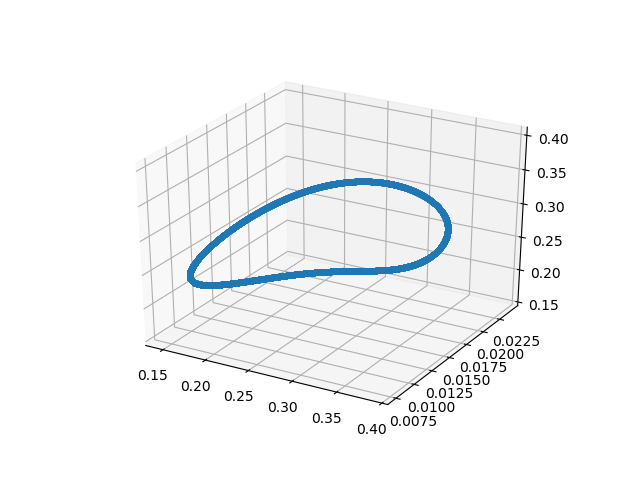

In [933]:
shift=19500
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(npa[shift:,1], npa[shift:,2], npa[shift:,3], '.')
plt.show()

<IPython.core.display.Javascript object>


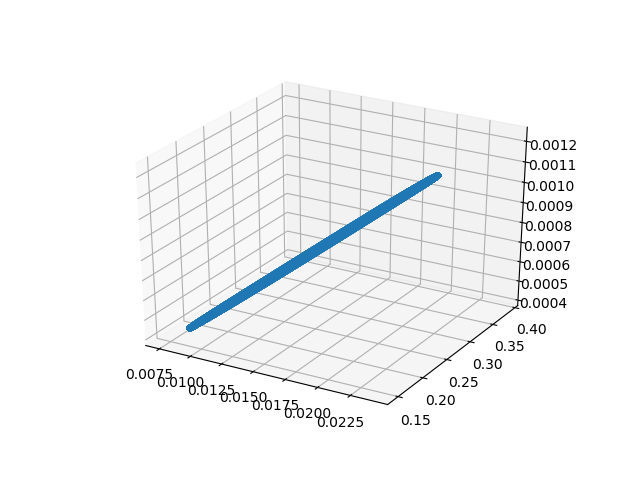

In [934]:
# shift=19500
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(npa2[shift:,1], npa2[shift:,2], npa2[shift:,3],'.')
plt.show()

In [761]:
M = N
dim, low, high, delta = M, 0., 1., .5
grid = cf.make_grid(dim, low, high, delta)
print(len(grid))

81


In [703]:
time=500
datas = np.zeros((len(grid), 2*time*10+1, N))
data_length_list = []
for j, gc in enumerate(grid):
    inits = gc
    inits_dict={}
    for i,init in enumerate(inits[:N]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


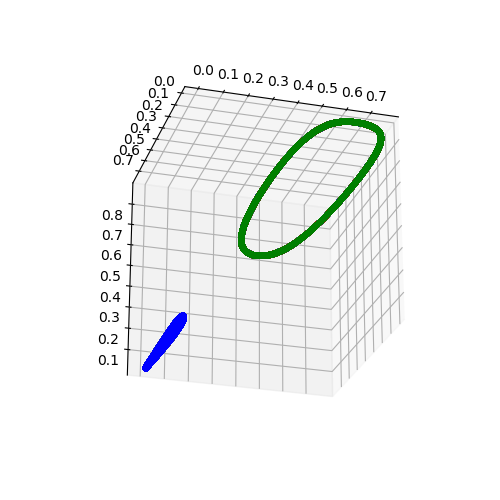

In [704]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
shift=1900
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(len(grid)):
    ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%M], label=j)
# plt.legend()
plt.show()

In [895]:
time=5000
P = 10
datas = np.zeros((P, 2*time*10+1, N))
data_length_list = []
for j in range(P):
    inits = np.random.rand(N)
    print(j, inits)
    inits_dict={}
    for i,init in enumerate(inits[:int(N)]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

0 [0.40984509 0.83394185 0.28294231 0.08446726]
1 [0.33828723 0.84893857 0.47692858 0.69770765]
2 [0.02447521 0.00592402 0.95668566 0.47513907]
3 [0.57251559 0.34184188 0.09925252 0.90476369]
4 [0.2088152  0.34652949 0.95147275 0.54710553]
5 [0.77290433 0.67993209 0.82338211 0.05430501]
6 [0.90013122 0.50038152 0.61086507 0.02244995]
7 [0.47141992 0.96344078 0.63484291 0.68433352]
8 [0.85988311 0.95159294 0.567046   0.05035269]
9 [0.52353564 0.9791456  0.32966261 0.01363038]


<IPython.core.display.Javascript object>


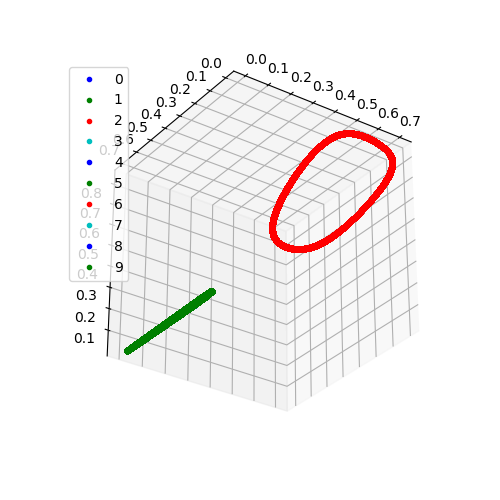

In [896]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
shift=1900
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(P):
    ax.plot(datas[j,shift:,0], datas[j,shift:,1], datas[j,shift:,2], '.', c=colors[j%M], label=j)
plt.legend()
plt.show()

In [865]:
# colors = ['b', 'g', 'r', 'c', 'm', 'y']
# fig = plt.figure()
# for j in range(2):
#     plt.plot(range(datas[j,:,0].shape[0]), datas[j,:,0], '.', c=colors[j%M], label=j)
# plt.show()

In [718]:
#put data in format for Combinatorial Dynamical System
# hdata = np.array([npa[shift:,1:5], npa2[shift:,1:5]])
shift = 30000
hdata = np.array([npa[shift:,1:], npa2[shift:,1:]])
print(hdata.shape)

hdata = np.reshape(hdata, (hdata.shape[0]*hdata.shape[1], hdata.shape[2]))
data_length_list = [npa.shape[0], npa2.shape[0]]
data_length_list = [npa[shift:,1:].shape[0], npa2[shift:,1:].shape[0]]

(2, 10001, 4)


In [719]:
#Make combinatorial dynamical system from the data
# datas = datas.reshape((datas.shape[0]*datas.shape[1], datas.shape[2]))
delta=0.001
cds = cf.Combinatorial_Dynamical_System(delta)
cds.initialise_with_data(hdata, data_length_list)

In [720]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components()
len(RCs)

2

<IPython.core.display.Javascript object>


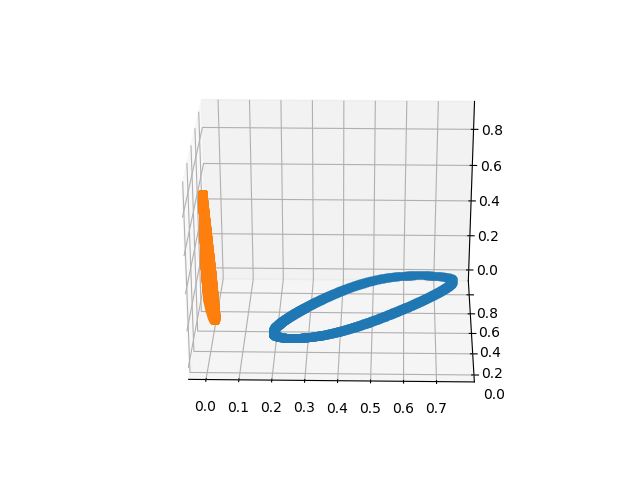

In [721]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(RCs)):
    ax.scatter(np.array(cds.cubes)[RCs[i]][:,0], np.array(cds.cubes)[RCs[i]][:,2], np.array(cds.cubes)[RCs[i]][:,3], marker='s')
plt.show()

<IPython.core.display.Javascript object>


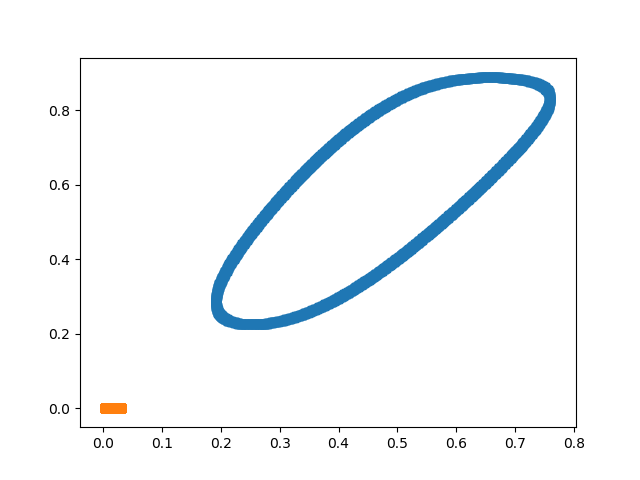

In [722]:
%matplotlib notebook

for i in range(len(RCs)):
    plt.scatter(np.array(cds.cubes)[RCs[i]][:,0], np.array(cds.cubes)[RCs[i]][:,2], marker='s')
plt.show()

In [723]:
Rcubes = {}
for i in range(len(RCs)):
    Rcubes[i] = cds.convert_indices_to_cubes(RCs[i])

In [725]:
RPcubes = {}

for i in range(len(RCs)):
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(cds.convert_indices_to_cubes(RCs[i]))
    
    # Betti numbers of recurrent components
#     print(cf.get_bettiNumbers_of_cubicalset(Rcubes[i], cds.delta))
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    N = RPcubes[i][0]
    N_ind = cds.convert_cubes_to_indices(N)
    S_ind = cds.invariantPart(N_ind)
    S_cubes = cds.convert_indices_to_cubes(S_ind)
    M = cds.cubical_wrap(S_cubes).intersection(cds.convert_indices_to_cubes(list(cds.G.nodes())))
    print("Finding isolated nbhd")
    for mstep in range(10):
        M = cds.cubical_wrap(M).intersection(cds.convert_indices_to_cubes(list(cds.G.nodes())))
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        P1cubes = cds.convert_indices_to_cubes(P1)
        P0cubes = cds.convert_indices_to_cubes(P0)
        RPcubes[i].append(P1cubes)
        RPcubes[i].append(P0cubes)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        p1cubes = cds.convert_to_invertal_representation(P1cubes)
        filetxt= cf.convert_to_chomp_format(p1cubes, delta)
        with open('wc3_rc%s_p1.cub'%(i+1), 'w') as f:
            f.writelines(filetxt)

        if P0 != set():
            p0cubes = cds.convert_to_invertal_representation(P0cubes)
            filetxt= cf.convert_to_chomp_format(p0cubes, delta)
            with open('wc3_rc%s_p0.cub'%(i+1), 'w') as f:
                f.writelines(filetxt)
        else:
            0
#             print("P0 is empty")
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)

        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
        
        print("Calculating homology")
        proc = subprocess.Popen(['homcubes','rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        linenum = 0
        while True:
            line = proc.stdout.readline()
            if not line:
                break
            if line.rstrip().decode('UTF-8')[0:2] == 'H_':
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
#         print("E")
        print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z
           H_1 = Z
Component 2
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z
           H_1 = Z
